In [1]:
# # 如果有使用 coloab 再執行此 cell
# from google.colab import drive
# drive.mount('/gdrive')
# !ln -s /gdrive/MyDrive/Credit_Card/ /content/

Mounted at /gdrive


In [ ]:
# !pip3 install gdown

# !mkdir -p ./data/
# import gdown


# url = 'https://drive.google.com/uc?id=%s'%("1NZ8jMoqcCDpydHxWm6j415HwVS093l4U")
# output = './data/X_sample.csv'
# gdown.download(url, output, quiet=False)


# url = 'https://drive.google.com/uc?id=%s'%("18w2LpyPbydD9qoVQ33GZI2LOjyRY2LaI")
# output = './data/y_sample.csv'
# gdown.download(url, output, quiet=False)

# url = 'https://drive.google.com/uc?id=%s'%("1-0TD5rSfzG3frbgT4fseGBn-Dn5OpGKy")
# output = './data/X_test.csv'
# gdown.download(url, output, quiet=False)

# url = 'https://drive.google.com/uc?id=%s'%("1-1p1dHQVV2JnGP4eMfzJsQwErum_wuMG")
# output = './data/y_test.csv'
# gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1NZ8jMoqcCDpydHxWm6j415HwVS093l4U
To: /content/data/X_sample.csv
48.9MB [00:00, 160MB/s] 
Downloading...
From: https://drive.google.com/uc?id=18w2LpyPbydD9qoVQ33GZI2LOjyRY2LaI
To: /content/data/y_sample.csv
100%|██████████| 288k/288k [00:00<00:00, 56.9MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-0TD5rSfzG3frbgT4fseGBn-Dn5OpGKy
To: /content/data/X_test.csv
609MB [00:02, 217MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-1p1dHQVV2JnGP4eMfzJsQwErum_wuMG
To: /content/data/y_test.csv
3.59MB [00:00, 144MB/s]


'./data/y_test.csv'

In [2]:
# !pip3  install -U mlxtend
# !pip3  install -U sklearn

     |████████████████████████████████| 1.4MB 15.1MB/s eta 0:00:01
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0
Requirement already up-to-date: sklearn in /usr/local/lib/python3.7/dist-packages (0.0)


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_X = pd.read_csv("X_train.csv")
df_X = df_X.set_index("txkey")

In [3]:
df_y = pd.read_csv("y_train.csv")
df_y = df_y.set_index("txkey")

In [4]:
df_X.shape, df_y.shape

((1217431, 21), (1521787, 1))

In [5]:
# 使 y 與 x_train 同樣尺度
x_train = df_X
y_train = df_y.loc[x_train.index]

# Feature Selection

In [6]:
import sklearn
sklearn.__version__

'0.24.2'

In [7]:
import mlxtend
mlxtend.__version__

'0.18.0'

In [8]:
from sklearn.svm import SVC
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

In [9]:
# ravel y to (n, )
y_train = y_train.values.ravel()
print(y_train.shape)

(1217431,)


In [ ]:
# Selecting the Best important features according to SVM

svc_ = SVC(kernel='rbf', probability=True)
sfs_selector = SFS(svc_, k_features = 5, forward=False, 
                   floating=False, verbose=2, scoring="accuracy", cv = 5)
sfs_selector.fit(x_train, y_train)

In [ ]:
k_f_idx = sfs_selector.k_feature_idx_
print(k_f_idx)
k_f_name = sfs_selector.k_feature_names_
print(k_f_name)

In [ ]:
k_subset = sfs_selector.subsets_
print(k_subset)

In [ ]:
# x_train.columns[sfs_selector.get_support()]
X_feature_set = x_train.loc[:,k_f_name]

# Training

In [ ]:
# Build a classifier to train
svm = SVC(kernel='rbf', probability=True)

In [ ]:
# fit the model svc
svm.fit(x_train, y_train)

# Validation with downsampling data

In [ ]:
# print('Starting predicting...')
# # predict
# y_pred_ds = gbm.predict(df_X_val, num_iteration=gbm.best_iteration)
# # eval
# print('auc:', roc_auc_score(df_y_val, y_pred_ds))

Starting predicting...
auc: 0.9655231831719928


In [ ]:
# confusion_matrix(df_y_val, (y_pred_ds > 0.5).astype(int))

array([[3543,  317],
       [ 213, 3569]])

In [ ]:
# tn, fp, fn, tp  = confusion_matrix(df_y_val, (y_pred_ds > 0.5).astype(int)).ravel() 

In [ ]:
# tn, fp, fn, tp

(3543, 317, 213, 3569)

# Testing : verify with real distribution data

In [ ]:
from sklearn.model_selection import train_test_split
# df_X_train, df_X_test = train_test_split(df_X_set, test_size=0.20, random_state=10)
x_test = pd.read_csv("./Credit_Card/X_test.csv")
x_test = x_test.set_index("txkey")
x_test.shape

In [ ]:
y_test = df_y.drop(labels=y_train.index, axis=0)
y_test.shape

In [ ]:
x_test.shape[0] == y_test.shape[0]

In [ ]:
# df_y_train = df_y.loc[df_X_train.index]
# df_y_test = df_y.loc[df_X_test.index]

In [ ]:
# # Train it on the entire training data set
# svm.fit(x_train, y_train)

# Get predictions on the test set
print('Starting predicting...')
y_pred = svm.predict(x_test)

Evaluation

y_train is a true vector

In [ ]:
# Return the mean accuracy on the given test data and labels.
score_rbf = svm.score(x_test, y_test)
print('mean accuracy: ', score_rbf)

In [ ]:
from sklearn.metrics import roc_auc_score
print('roc auc: ', roc_auc_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import accuracy_score
print('accuracy: ', accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import recall_score
print('recall: ', recall_score(y_test, y_pred))

# sklearn Metrics

In [ ]:
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, average_precision_score 
from sklearn.metrics import confusion_matrix, precision_recall_curve, roc_curve, auc, log_loss, classification_report 

In [ ]:
cm = confusion_matrix(y_test, (y_pred > 0.5).astype(int), labels=[0,1])
cm

array([[341759,  33616],
       [   293,   4779]])

In [ ]:
th = .6
print("precision_score = ", precision_score(y_test,(y_pred > th).astype(int)))
print("recall_score = ", recall_score(y_test,(y_pred > th).astype(int)))
print("f1_score = ", f1_score(y_test,(y_pred > th).astype(int)))

precision_score 0.1468980422069667
recall_score 0.9112776025236593
f1_score 0.2530107291438581


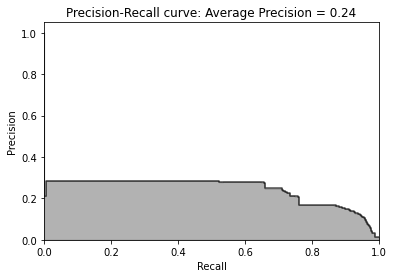

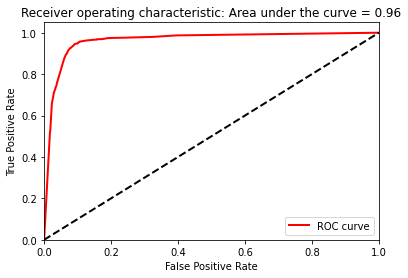

In [ ]:
#LGB
precision, recall, thresholds = \
    precision_recall_curve(y_test,y_pred)
average_precision = \
    average_precision_score(y_test,y_pred)

plt.step(recall, precision, color='k', alpha=0.7, where='post')
plt.fill_between(recall, precision, step='post', alpha=0.3, color='k')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

plt.title('Precision-Recall curve: Average Precision = {0:0.2f}'.format(
          average_precision))

fpr, tpr, thresholds = \
    roc_curve(y_test,y_pred)
areaUnderROC = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='r', lw=2, label='ROC curve')
plt.plot([0, 1], [0, 1], color='k', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic: \
Area under the curve = {0:0.2f}'.format(areaUnderROC))
plt.legend(loc="lower right")
plt.show()

In [ ]:
fnscore =  [ (fname,socre) for fname,socre in zip(gbm.feature_name(),gbm.feature_importance())]

In [ ]:
top_feature = sorted(fnscore, key=lambda tup: tup[1], reverse=True)[:25]

# Bias and Variance ，[參考資料1](https://machinelearningmastery.com/gentle-introduction-to-the-bias-variance-trade-off-in-machine-learning/), [參考資料二]
* 一般來模型的 Bias 和 Variance 會呈現互斥的現像
* 通常來說 Bias 越低，代表可能產生 Overfitting ，而 Overfitting 通常代表 Vairance 越高，其意義代表對於 Input 資料的敏感到越高。
## How to Caculate the Model's Bias
* Bias 的定義: Bias 是模型的預測(產出)的均值與實際值的差異(Bias is the difference between the mean of these estimates and the actual value.)
* Model Bias Formula : $$ {1 \over n}\sum\limits_{k=1}^n \{{\hat{y}-y_i}\}^2 $$
## How to Caculate the Model's Variance
* Variance 定義：這與實際(y label)的 value 沒關係，而是這個組模型的穩定度，在不同 sub training set 所產出相對應的 model 對於 同一組 testing data 所預測(產出)的值的 variance .
* Variance Defintion: Variance is the amount that the estimate of the target function will change if different training data was used.
*  Model Variance Formula:$$ {1 \over N}\sum\limits_{n=1}^N {1 \over L}\sum\limits_{l=1}^l \{{ y^l(x_n) -  \bar{y}(x_n) }\}^2 $$
* N 為 testing data 的數(筆)量，L 將 training data 折成多少個 sub trainin set (N is the number of rows that is in testing set . L is the number of subset that is splited from all training set. )

## 使用不同的模型來看 Bias 與 Variance 的變化

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(df_X_train,df_y_train)
y_pred = lr.predict(X_test,)
print('auc:', roc_auc_score(y_test, y_pred))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


auc: 0.9153174937575568


In [ ]:
df_X_train = df_X_train.reset_index(drop=True)
df_y_train = df_y_train.reset_index(drop=True)

In [ ]:
X_test = X_test.reset_index(drop=True)
y_test = y_test.reset_index(drop=True)

In [ ]:
y_test

,fraud_ind
0,0
1,0
2,0
3,0
4,0
...,...
380442,0
380443,0
380444,0
380445,1


In [ ]:
from mlxtend.evaluate import bias_variance_decomp
lr = LogisticRegression()


# first calculate all the statistical parameters before pruning
mse_decision_tree, bias_decision_tree, var_decision_tree = bias_variance_decomp(lr, 
        df_X_train.to_numpy(), df_y_train.to_numpy(), X_test.to_numpy(), y_test.to_numpy(), 
        '0-1_loss', random_seed=123 )

# random_seed : Used to initialize a pseudo-random
# number generator for the bias-variance decomposition
print('Original Bias from un-pruned data ', np.round(bias_decision_tree, 2))
print('Original Variance from un-pruned data ', np.round(var_decision_tree, 2))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example

KeyboardInterrupt: ignored

In [ ]:
df_X_train.to_numpy()

array([[-0.19295789,  0.40389234,  0.54547933, ...,  0.        ,
         0.        ,  0.        ],
       [-1.76428378, -0.62642089,  0.5442519 , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.06405948,  1.00898319,  1.09937523, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.38284073,  1.67649549, -1.67643777, ...,  0.        ,
         0.        ,  0.        ],
       [-1.84862799,  1.01929519,  1.22406522, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.3556115 , -1.59310819,  1.29301376, ...,  1.        ,
         0.        ,  0.        ]])